# Movie Rating Analysis

# <span style="color:blue">Step1: Data Extraction</span>

## 1. Import Libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

## 2. Import Dataset from File

In [3]:
# Predefine columns array
colnames=['Title', 'Year', 'Age', 'IMDb', 'RottenTomatoes', 'Netflix', 'Hulu', 'PrimeVideo', 'Disney+', 'type']

# Load data using the custom header array
ratings = pd.read_csv("data/tv_shows.csv", names=colnames, header=0, index_col = [0])

# <span style="color:blue">Step2: Data Cleaning</span>

## 3. Examine values and records in the loaded Dataset

In [4]:
# Preview records
ratings.head()

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [5]:
# Check number of rows loaded
ratings.shape

(5611, 10)

In [6]:
# Check value types and number of values in each column.
ratings.info()

# Notice that few columns != 5611 means missing values.  Columns: Age, IMDb, RottenTomatoes are not complete.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5611 entries, 0 to 5610
Data columns (total 10 columns):
Title             5611 non-null object
Year              5611 non-null int64
Age               3165 non-null object
IMDb              4450 non-null float64
RottenTomatoes    1011 non-null object
Netflix           5611 non-null int64
Hulu              5611 non-null int64
PrimeVideo        5611 non-null int64
Disney+           5611 non-null int64
type              5611 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 482.2+ KB


In [7]:
# Describe to see numeric column basic stats, outliers, etc.
ratings.describe()

,Year,IMDb,Netflix,Hulu,PrimeVideo,Disney+,type
count,5611.000000,4450.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2011.021030,7.113258,0.344145,0.312600,0.382107,0.032080,1.0
std,11.005116,1.132060,0.475131,0.463594,0.485946,0.176228,0.0
min,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2010.000000,6.600000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2017.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0
max,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0


In [8]:
# Describe stats for one column in detail
ratings.IMDb.describe()

count    4450.000000
mean        7.113258
std         1.132060
min         1.000000
25%         6.600000
50%         7.300000
75%         7.900000
max         9.600000
Name: IMDb, dtype: float64

## 4. Clean dataset - fix duplicate, missing and empty data

In [9]:
# Check to see if there are any dup rows in the file (entire row dups not specific columns)
ratings.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5606    False
5607    False
5608    False
5609    False
5610    False
Length: 5611, dtype: bool

In [10]:
# Check to see if there are any dup rows for Title (Title is the supposed to be unique for this dataset)
ratings.duplicated(subset=['Title'])

0       False
1       False
2       False
3       False
4       False
        ...  
5606    False
5607    False
5608    False
5609    False
5610    False
Length: 5611, dtype: bool

In [11]:
# Check to see if there are missing values on each column.
ratings.isnull()

# Observe that as checked earlier, columns Age, IMDb, RottenTomatoes have missing values.

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5606,False,False,True,True,True,False,False,False,False,False
5607,False,False,True,True,True,False,False,False,False,False
5608,False,False,True,True,True,False,False,False,False,False
5609,False,False,True,True,True,False,False,False,False,False


In [12]:
# Check to see how many rows will remain if rows with empty values are removed.  
ratings.dropna(axis=0, how='any').shape

# Removing 931 of 5611 is too bad idea.  Ideally you can fill the data with 0's or avg, etc.
# df[‘age’].fillna(value=df[‘age’].mean())

(931, 10)

In [13]:
# For simplicity we will just remove rows with missing values.
ratings.dropna(axis=0, how='any', inplace=True)

In [14]:
ratings.shape

(931, 10)

In [15]:
# Confirmed that there are no more missing values
ratings.isnull()

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5509,False,False,False,False,False,False,False,False,False,False
5517,False,False,False,False,False,False,False,False,False,False
5522,False,False,False,False,False,False,False,False,False,False
5530,False,False,False,False,False,False,False,False,False,False


In [16]:
ratings.dtypes

Title              object
Year                int64
Age                object
IMDb              float64
RottenTomatoes     object
Netflix             int64
Hulu                int64
PrimeVideo          int64
Disney+             int64
type                int64
dtype: object

# <span style="color:blue">Step3: Data Wrangling</span>

Typical steps involves:
* Hierarchical Data
* Handling categorical data
* Reshaping and transforming structures
* Indexing data for quick access
* Merging, combining and joining data


## 5. Transforming datatypes

In [17]:
# Preview sample records
ratings.head()

# Notice Age & RottentTomatoes are not having right types for easy manipulation.

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [18]:
# Check all possible values in RottenTomatoes column.
ratings.Age.unique()

array(['18+', '16+', '7+', 'all', '13+'], dtype=object)

In [19]:
# Transform Age ratings to int values by removing + sign and replacing all with 0.

ratings['Age'] = ratings.Age.apply(lambda x: x.replace('+', ' ').replace('all', '0')).astype('int64')

In [20]:
ratings.Age.unique()

array([18, 16,  7,  0, 13])

In [21]:
ratings.Age.dtype

dtype('int64')

In [22]:
# Check all possible values in RottenTomatoes column.
ratings.RottenTomatoes.unique()

array(['96%', '93%', '91%', '78%', '97%', '81%', '83%', '92%', '100%',
       '94%', '89%', '88%', '72%', '67%', '85%', '87%', '90%', '75%',
       '70%', '86%', '71%', '82%', '64%', '95%', '77%', '63%', '99%',
       '50%', '80%', '84%', '98%', '68%', '62%', '40%', '39%', '57%',
       '69%', '54%', '44%', '66%', '65%', '27%', '45%', '37%', '74%',
       '51%', '61%', '73%', '33%', '38%', '11%', '60%', '30%', '28%',
       '55%', '24%', '36%', '32%', '47%', '58%', '35%', '56%', '22%',
       '79%', '6%', '41%', '19%', '8%', '17%', '31%', '20%', '34%', '76%',
       '42%', '53%', '59%', '52%', '43%', '9%', '48%', '23%', '25%',
       '21%', '18%', '46%', '26%', '14%', '15%'], dtype=object)

In [23]:
# Transform RottonTomatoes ratings to int values by removing % sign.

ratings['RottenTomatoes'] = ratings.RottenTomatoes.apply(lambda x: x.replace('%', ' ')).astype('int64')

In [24]:
ratings.RottenTomatoes.unique()

array([ 96,  93,  91,  78,  97,  81,  83,  92, 100,  94,  89,  88,  72,
        67,  85,  87,  90,  75,  70,  86,  71,  82,  64,  95,  77,  63,
        99,  50,  80,  84,  98,  68,  62,  40,  39,  57,  69,  54,  44,
        66,  65,  27,  45,  37,  74,  51,  61,  73,  33,  38,  11,  60,
        30,  28,  55,  24,  36,  32,  47,  58,  35,  56,  22,  79,   6,
        41,  19,   8,  17,  31,  20,  34,  76,  42,  53,  59,  52,  43,
         9,  48,  23,  25,  21,  18,  46,  26,  14,  15])

In [25]:
# Validate that issues are fixed
ratings.head()

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,type
0,Breaking Bad,2008,18,9.5,96,1,0,0,0,1
1,Stranger Things,2016,16,8.8,93,1,0,0,0,1
2,Money Heist,2017,18,8.4,91,1,0,0,0,1
3,Sherlock,2010,16,9.1,78,1,0,0,0,1
4,Better Call Saul,2015,18,8.7,97,1,0,0,0,1


In [26]:
ratings.RottenTomatoes.dtype

dtype('int64')

# <span style="color:blue">Step4: Data Analysis</span>

Typically involves:
* Exploration
* Building statistical models
* Visualization and representations
* Correlation vs Causation analysis
* Hypothesis testing
* Statistical analysis
* Reporting

## 6. Expore the data by asking various questions:

### 6.1 What are the top 10 rated movies according to RottenTomatoes?

In [27]:
ratings.sort_values(by = 'RottenTomatoes', ascending=False)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,type
89,Fauda,2015,16,8.3,100,1,0,0,0,1
742,Final Fantasy XIV: Dad of Light,2017,7,7.2,100,1,0,0,0,1
1972,Black Books,2000,7,8.5,100,0,1,1,0,1
2025,Inside No. 9,2014,18,8.5,100,0,1,0,0,1
92,Big Mouth,2017,18,8.0,100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5506,Marvel's Inhumans,2017,7,5.0,11,0,0,0,1,1
2540,Rosewood,2015,16,6.7,9,0,1,0,0,1
2958,Saved by the Bell: The College Years,1993,7,6.3,9,0,1,0,0,1
840,The I-Land,2019,18,4.5,8,1,0,0,0,1


In [28]:
ratings[ratings.RottenTomatoes == 100].count()

Title             95
Year              95
Age               95
IMDb              95
RottenTomatoes    95
Netflix           95
Hulu              95
PrimeVideo        95
Disney+           95
type              95
dtype: int64

In [29]:
ratings[ratings.RottenTomatoes == 100].shape[0]

95

In [30]:
ratings.sort_values(by = ['RottenTomatoes','Year'], ascending=False).head(15)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,type
192,Middleditch & Schwartz,2020,18,8.7,100,1,0,0,0,1
507,Queen Sono,2020,18,5.8,100,1,0,0,0,1
5509,Diary of a Future President,2020,7,5.5,100,0,0,0,1,1
230,The Order,2019,18,6.9,100,1,0,0,0,1
278,The Chef Show,2019,18,8.2,100,1,0,0,0,1
296,Hyperdrive,2019,7,8.1,100,1,0,0,0,1
338,Rilakkuma and Kaoru,2019,7,8.4,100,1,0,0,0,1
377,The Confession Killer,2019,16,7.4,100,1,0,0,0,1
400,It's Bruno!,2019,7,7.5,100,1,0,0,0,1
438,Tuca & Bertie,2019,16,7.4,100,1,0,0,0,1


In [31]:
topTenRotten = ratings.sort_values(by = ['RottenTomatoes','Year'], ascending=False).head(10)

In [32]:
topTenRotten[['Title', 'Year', 'RottenTomatoes']]

,Title,Year,RottenTomatoes
192,Middleditch & Schwartz,2020,100
507,Queen Sono,2020,100
5509,Diary of a Future President,2020,100
230,The Order,2019,100
278,The Chef Show,2019,100
296,Hyperdrive,2019,100
338,Rilakkuma and Kaoru,2019,100
377,The Confession Killer,2019,100
400,It's Bruno!,2019,100
438,Tuca & Bertie,2019,100


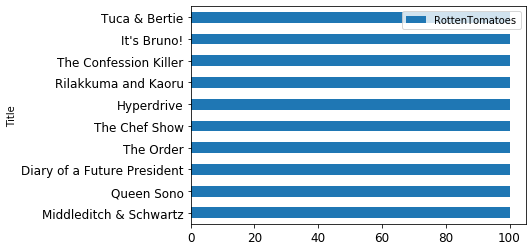

In [33]:
topTenRotten[['Title', 'RottenTomatoes']].set_index('Title').plot(kind='barh', fontsize=12)

### 6.2 What are the top ten rated movies in IMDB?

In [34]:
ratings.sort_values(by = ['IMDb','Year'], ascending=False).head(15)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,type
0,Breaking Bad,2008,18,9.5,96,1,0,0,0,1
3567,Band of Brothers,2001,18,9.4,94,0,0,1,0,1
91,Our Planet,2019,7,9.3,93,1,0,0,0,1
3566,The Wire,2002,18,9.3,94,0,0,1,0,1
1931,Rick and Morty,2013,18,9.2,94,0,1,0,0,1
9,Avatar: The Last Airbender,2005,7,9.2,100,1,0,0,0,1
3568,The Sopranos,1999,18,9.2,92,0,0,1,0,1
3649,The Planets,2019,0,9.1,100,0,0,1,0,1
5465,The Imagineering Story,2019,7,9.1,100,0,0,0,1,1
97,The Vietnam War,2017,18,9.1,98,1,0,0,0,1


In [35]:
topTenIMDb = ratings.sort_values(by = ['IMDb','Year'], ascending=False).head(10)

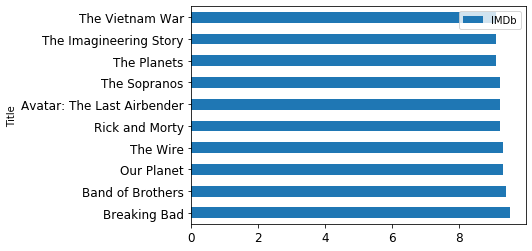

In [36]:
topTenIMDb[['Title', 'IMDb']].set_index('Title').plot(kind='barh', fontsize=12)

### 6.3 How many movies have a 18+ restriction?

In [37]:
ratings[ratings.Age == 18].shape[0]

376

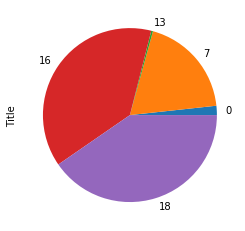

In [38]:
ratings.groupby('Age')['Title'].count().plot(kind='pie')

### 6.4 How many movies were made in 2010 and have IMDb rating of >= 5?

In [39]:
ratings[(ratings.Year == 2010) & (ratings.IMDb >= 5)].shape[0]

24

### 6.5 How many different age categories are there?

In [40]:
ageGroups = ratings.Age.unique()

In [41]:
ageGroups

array([18, 16,  7,  0, 13])

In [42]:
ratings.Age.value_counts()

18    376
16    359
7     177
0      16
13      3
Name: Age, dtype: int64

In [43]:
ageRatings = ratings.groupby('Age').Title.count()

In [44]:
ageRatings

Age
0      16
7     177
13      3
16    359
18    376
Name: Title, dtype: int64

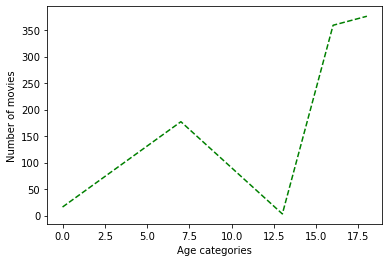

In [45]:
plt.close()
plt.plot(ageRatings, 'g--')
plt.xlabel("Age categories")
plt.ylabel("Number of movies")
plt.show()

### 6.6 Understand how Age restrictions have changed before and after year 2000.

In [46]:
yearGroups = ratings.Year.unique()

In [47]:
yearGroups

array([2008, 2016, 2017, 2010, 2015, 2005, 2011, 2013, 2009, 2006, 2019,
       1990, 2014, 2018, 2007, 2003, 2020, 1999, 2012, 1959, 1987, 1966,
       2000, 1995, 1969, 1998, 1993, 1988, 2004, 1992, 2001, 1989, 2002,
       1997, 1991, 1981, 1963, 1978, 1964])

In [48]:
type(yearGroups)

numpy.ndarray

In [49]:
yearGroups = -pd.np.sort(-yearGroups)

In [50]:
yearGroups

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1995, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1981,
       1978, 1969, 1966, 1964, 1963, 1959])

In [51]:
yearGroups.min()

1959

In [52]:
yearGroups.max()

2020

In [53]:
pre2000Ratings = ratings[(ratings.Year <= 2000)]

In [54]:
pre2000Ratings.shape[0]

60

In [55]:
pre2000Ratings.head(10)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,type
22,Twin Peaks,1990,18,8.8,89,1,1,0,0,1
54,Family Guy,1999,18,8.1,71,1,1,0,0,1
59,The Twilight Zone,1959,7,9.0,82,1,1,0,0,1
63,Star Trek: The Next Generation,1987,7,8.6,89,1,1,1,0,1
79,The West Wing,1999,16,8.8,75,1,0,0,0,1
99,Star Trek,1966,7,8.3,80,1,1,1,0,1
106,Gilmore Girls,2000,16,8.1,85,1,0,0,0,1
110,Neon Genesis Evangelion,1995,16,8.5,100,1,0,0,0,1
112,Monty Python's Flying Circus,1969,16,8.8,100,1,0,0,0,1
133,Charmed,1998,16,7.1,75,1,0,0,0,1


In [56]:
post2000Ratings = ratings[(ratings.Year > 2000)]

In [57]:
post2000Ratings.shape[0]

871

In [58]:
post2000Ratings.head(10)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,type
0,Breaking Bad,2008,18,9.5,96,1,0,0,0,1
1,Stranger Things,2016,16,8.8,93,1,0,0,0,1
2,Money Heist,2017,18,8.4,91,1,0,0,0,1
3,Sherlock,2010,16,9.1,78,1,0,0,0,1
4,Better Call Saul,2015,18,8.7,97,1,0,0,0,1
5,The Office,2005,16,8.9,81,1,0,0,0,1
6,Black Mirror,2011,18,8.8,83,1,0,0,0,1
7,Supernatural,2005,16,8.4,93,1,0,0,0,1
8,Peaky Blinders,2013,18,8.8,92,1,0,0,0,1
9,Avatar: The Last Airbender,2005,7,9.2,100,1,0,0,0,1


In [59]:
pre2000AgeGroups = pre2000Ratings.groupby('Age').Title.count()

In [60]:
pre2000AgeGroups

Age
0      5
7     27
13     1
16    14
18    13
Name: Title, dtype: int64

In [61]:
post2000AgeGroups = post2000Ratings.groupby('Age').Title.count()

In [62]:
post2000AgeGroups

Age
0      11
7     150
13      2
16    345
18    363
Name: Title, dtype: int64

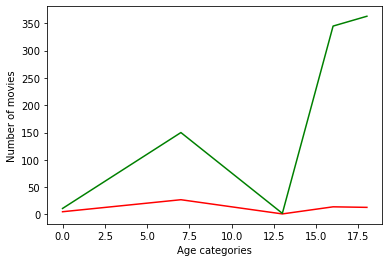

In [63]:
#Plot AgeGroups by Count
plt.close()
plt.plot(pre2000AgeGroups, 'r')
plt.plot(post2000AgeGroups, 'g')
plt.xlabel("Age categories")
plt.ylabel("Number of movies")
plt.show()

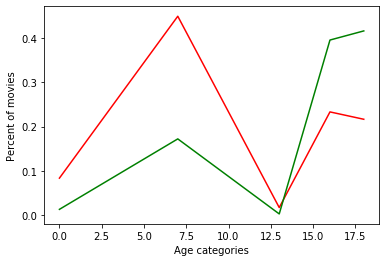

In [64]:
#Plot AgeGroups by Percentage
plt.close()
plt.plot(pre2000AgeGroups/sum(pre2000AgeGroups), 'r')
plt.plot(post2000AgeGroups/sum(post2000AgeGroups), 'g')
plt.xlabel("Age categories")
plt.ylabel("Percent of movies")
plt.show()

# <span style="color:blue">Step5: Action</span> 

Typically involves:
* Building Machine Learning Models
* Feature Engineering
* Moving ML into production
* Building ETL pipelines
* Live dashboard and reporting
* Decision making and real-life tests